In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
#import mysql.connector
import plotly
import plotly.plotly as py #library https://plot.ly/pandas/
import plotly.graph_objs as go
#NASAQ 3 Year NIGR>25, preIPO 招股说明书上市前两年净收入。分析数字背后的故事，看懂数字背后的金融来去，包括投资到未来有成长空间的。软件和电商类优先。
plotly.tools.set_credentials_file(username='zhenxu66', api_key='yZ5rrla4FGut06wbewMo')

In [2]:
df_allndlist= pd.read_csv('./csv/list_nd2_all.csv')

In [3]:
df_allndlist.head(2)

,id,symbol,name,sector,industry,country,board,prof_marginPCT,ppe,marketCapMillion,...,avgVolumn3MonthMillion,priceNow,recomm1buy5sell,SMA20PCT,SMA50PCT,SMA200PCT,2014to2013,2015to2014,2016to2015,2017to2016
0,1,ABIL,Ability Inc.,Technology,Communication Equipment,Israel,[NASD],0.000,0.0,9.38,...,0.772,0.0285,0.030,-0.1061,-0.1786,-0.2558,12.1500,3.7255,-1.5459,-0.1314
1,2,JOBS,"51job, Inc.",Services,Staffing & Outsourcing Services,China,[NASD],-0.077,0.0,3350.00,...,0.310,0.6098,0.015,0.0067,-0.0994,-0.2576,-0.1274,0.3818,-0.1350,-0.3528


In [4]:
df_allndlist_25 = df_allndlist[(df_allndlist['2015to2014']>0.25)
                                     & (df_allndlist['2016to2015']>0.25) & (df_allndlist['2017to2016']>0.25)]
print('Total stocks that satisfy four year continous NIGR>25%:'+str(len(df_allndlist_25))+ ' out of '
      +str(len(df_allndlist))+ ' total nasdaq stock that IPO before 2014'+'\n' )
if len(df_allndlist_25)<10:
    print(df_allndlist_25)
else:
    print(df_allndlist_25.name.tolist())
    print(df_allndlist_25.symbol.tolist())

Total stocks that satisfy four year continous NIGR>25%:52 out of 890 total nasdaq stock that IPO before 2014

['Adobe Inc.', 'Weibo Corporation', 'U.S. Auto Parts Network, Inc.', 'Truett-Hurst, Inc.', 'Tristate Capital Holdings, Inc.', 'Tecogen Inc.', 'Take-Two Interactive Software, Inc.', 'Spark Energy, Inc.', 'Shutterfly, Inc.', 'Schnitzer Steel Industries, Inc.', 'Regeneron Pharmaceuticals, Inc.', 'Qualstar Corporation', 'PRGX Global, Inc.', 'Penn National Gaming, Inc.', 'Paylocity Holding Corporation', 'Orthofix Medical Inc.', 'NV5 Global, Inc.', 'Momo Inc.', 'Mercury Systems, Inc.', 'Melrose Bancorp, Inc.', 'Medidata Solutions, Inc.', 'LGI Homes, Inc.', 'LeMaitre Vascular, Inc.', 'Lantronix, Inc.', 'Landmark Infrastructure Partners LP', 'Lam Research Corporation', 'Itron, Inc.', 'Independent Bank Group, Inc.', 'Image Sensing Systems, Inc.', 'Huazhu Group Limited', 'Hologic, Inc.', 'Heritage-Crystal Clean, Inc', 'HealthEquity, Inc.', 'Health Insurance Innovations, Inc.', 'Gibraltar

In [5]:
#df_allndlist_25.info()

In [6]:
df_sector = df_allndlist[df_allndlist['sector']=='Technology']
data_sector = [go.Histogram(
        x=df_allndlist['sector'],
        name='all',
        marker=dict(
            color='#FFD7E9',
        ),
        opacity=0.75
    ),
               go.Histogram(
        x=df_allndlist_25['sector'],
        name='NIGR>25',
        marker=dict(
            color='#EB89B5',
        ),
        opacity=0.75
    ),
           ]

layout = go.Layout(
    title='Sector hist Results',
    xaxis=dict(
        title='Sector',
    ),
    yaxis=dict(
        title='Count',
        automargin=True,
        type = 'log'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=True

)
fig = go.Figure(data=data_sector, layout=layout)
py.iplot(fig, filename='styled histogram')

In [8]:
def plot_df_industry_symbols(df, sector):
    df_sector = df[df['sector']==sector]
    def industry_merge_company(industry):
        df_sector_industry = df_sector[df_sector['industry']==industry]
        return df_sector_industry['symbol'].str.cat(sep=',')
    
    value_counts = df_sector['industry'].value_counts()
    df_industry = value_counts.rename_axis('industry').reset_index(name='counts')
    df_industry['symbols'] = df_industry['industry'].apply(industry_merge_company)
    trace = go.Pie(labels=df_industry['industry'], values=df_industry['counts'], text = df_industry.symbols, textinfo='label+value')
    return trace

def df_industry_symbols(df, sector):
    df_sector = df[df['sector']==sector]
    def industry_merge_company(industry):
        df_sector_industry = df_sector[df_sector['industry']==industry]
        return df_sector_industry['symbol'].str.cat(sep=',')
    
    value_counts = df_sector['industry'].value_counts()
    df_industry = value_counts.rename_axis('industry').reset_index(name='counts')
    df_industry['symbols'] = df_industry['industry'].apply(industry_merge_company)
    return df_industry
trace_25 = plot_df_industry_symbols(df_allndlist,'Technology')
py.iplot([trace_25],filename='basic_pie_chart')

In [9]:
len(df_industry_symbols(df_allndlist,'Technology'))

27

In [10]:
#df_industry_symbols(df_allndlist_25,'Technology')
#df_industry_symbols(df_allndlist,'Technology')
#merge two plots together
fig = {
  "data": [
    {
      "values": df_industry_symbols(df_allndlist_25,'Technology')['counts'].tolist(),
      "labels": df_industry_symbols(df_allndlist_25,'Technology')['industry'].tolist(),
      "text":   df_industry_symbols(df_allndlist_25,'Technology').symbols.tolist(),
      "domain": {"x": [0, .48]},
      "name": "NIRG >25%",
      "hoverinfo":"label+percent+name+text",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": df_industry_symbols(df_allndlist,'Technology')['counts'].tolist(),
      "labels": df_industry_symbols(df_allndlist,'Technology')['industry'].tolist(),
      "text":   df_industry_symbols(df_allndlist,'Technology').symbols.tolist(),
      "textposition":"none",
      "domain": {"x": [.52, 1]},
      "name": "All Nasdaq",
      "hoverinfo":"label+percent+name+text",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Technology Section Compare",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "NIRG >25%"+'\n'+str(len(df_industry_symbols(df_allndlist_25,'Technology'))),
                "x": 0.15,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "All Nasdaq"+'\n'+str(len(df_industry_symbols(df_allndlist,'Technology'))),
                "x": 0.85,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\tools.py:1428: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [18]:
def sector_plot(sector):
    fig = {
      "data": [
        {
          "values": df_industry_symbols(df_allndlist_25,sector)['counts'].tolist(),
          "labels": df_industry_symbols(df_allndlist_25,sector)['industry'].tolist(),
          "text":   df_industry_symbols(df_allndlist_25,sector).symbols.tolist(),
          "domain": {"x": [0, .48]},
          "name": "NIRG >25%",
          "hoverinfo":"label+percent+name+text",
          "hole": .4,
          "type": "pie"
        },
        {
          "values": df_industry_symbols(df_allndlist,sector)['counts'].tolist(),
          "labels": df_industry_symbols(df_allndlist,sector)['industry'].tolist(),
          "text":   df_industry_symbols(df_allndlist,sector).symbols.tolist(),
          "textposition":"none",
          "domain": {"x": [.52, 1]},
          "name": "All Nasdaq",
          "hoverinfo":"label+percent+name+text",
          "hole": .4,
          "type": "pie"
        }],
      "layout": {
            "title":"Technology Section Compare",
            "annotations": [
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "NIRG >25%"+'\n'+str(len(df_industry_symbols(df_allndlist_25,sector))),
                    "x": 0.15,
                    "y": 0.5
                },
                {
                    "font": {
                        "size": 20
                    },
                    "showarrow": False,
                    "text": "All Nasdaq"+'\n'+str(len(df_industry_symbols(df_allndlist,sector))),
                    "x": 0.85,
                    "y": 0.5
                }
            ]
        }
    }
    return fig
py.iplot(sector_plot('Consumer Goods'), filename='donut')

C:\Users\zxu\AppData\Local\Continuum\Anaconda3\lib\site-packages\plotly\tools.py:1428: UserWarning:

Looks like you used a newline character: '\n'.

Plotly uses a subset of HTML escape characters
to do things like newline (<br>), bold (<b></b>),
italics (<i></i>), etc. Your newline characters 
have been converted to '<br>' so they will show 
up right on your Plotly figure!



In [11]:
data_ipo_year = [go.Histogram(
        x=df_allndlist['ipo_year'],
        name='all',
        marker=dict(
            color='#FFD7E9',
        ),
        opacity=0.75
    ),
               go.Histogram(
        x=df_allndlist_25['ipo_year'],
        name='NIGR>25',
        marker=dict(
            color='#EB89B5',
        ),
        opacity=0.75
    ),
           ]

layout = go.Layout(
    title='ipo_year hist Results',
    xaxis=dict(
        title='ipo_year',
    ),
    yaxis=dict(
        title='Count',
        automargin=True,
        type = 'log'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=True

)
fig = go.Figure(data=data_ipo_year, layout=layout)
py.iplot(fig, filename='styled histogram')

In [12]:
data_country = [go.Histogram(
        x=df_allndlist['country'],
        name='all',
        marker=dict(
            color='#FFD7E9',
        ),
        opacity=0.75
    ),
               go.Histogram(
        x=df_allndlist_25['country'],
        name='NIGR>25',
        marker=dict(
            color='#EB89B5',
        ),
        opacity=0.75
    ),
           ]

layout = go.Layout(
    title='country hist Results',
    xaxis=dict(
        title='country',
    ),
    yaxis=dict(
        title='Count',
        automargin=True,
        type ='log'
    ),
    bargap=0.2,
    bargroupgap=0.1,
    autosize=True

)
fig = go.Figure(data=data_country, layout=layout)
py.iplot(fig, filename='styled histogram')

In [13]:
fig = {
    'data': [
        {
            'x': df_allndlist_25['ppe'], 
            'y': df_allndlist_25['marketCapMillion'], 
            'text': df_allndlist_25.symbol + ' name:'+ df_allndlist_25.name,  #cannot access columns with '' '' 
            'mode': 'markers', #+text
            'marker':dict(
                size= 8, #30*df_allnd100list['inst_own'],
                color = df_allndlist_25['recomm1buy5sell'], #set color equal to a variable
                colorscale='Viridis',
                showscale=True
            ),
            'name': 'Results'},      

    ],
    'layout': {
        'title': 'market_volumn compared with price per earnings and profit_margin (%)',
        'xaxis': {'title': 'price per earnings','autorange':True,'type': 'log'},
        'yaxis': {'title': "mark_volumn",'autorange':True,'type': 'log'},
        'showlegend': True,
        'annotations':[ #not working
            dict(
                x=1100,#df_allnd100list[df_allnd100list.symbol=='AAPL']['mark_cap(billion)'].item(),
                y=4800,#df_allnd100list[df_allnd100list.symbol=='AAPL']['shares_out(million)'].item(),
                xref='x',
                yref='y',
                text='dict Text is here',
                showarrow=True,
                arrowhead=7,
                ax=0,
                ay=-40
            ),
        ]
    }
}

In [14]:
py.iplot(fig, filename='scatter')  #py.plot will generate a webpage

In [19]:
column_PCT=[]
for i in df_allndlist_25.columns.tolist():
    if i[-3:]=='PCT':
        column_PCT.append(i)
print(df_allndlist_25.columns.tolist())
print(column_PCT)


['id', 'symbol', 'name', 'sector', 'industry', 'country', 'board', 'prof_marginPCT', 'ppe', 'marketCapMillion', 'descShort', 'url_reuter', 'url_marketwatch', 'ipo_year', 'url', 'EPS', 'insideOwnPCT', 'forwardPPE', 'nextYEPS', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'dividAnn', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'avgVolumn3MonthMillion', 'priceNow', 'recomm1buy5sell', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT', '2014to2013', '2015to2014', '2016to2015', '2017to2016']
['prof_marginPCT', 'insideOwnPCT', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT']


In [20]:
group = df_allndlist_25.columns.to_series().groupby(df_allndlist_25.dtypes).groups
dict_group = {k.name: v for k, v in group.items()}
float_column = dict_group.get('float64').tolist()
print(float_column)

['prof_marginPCT', 'ppe', 'marketCapMillion', 'EPS', 'insideOwnPCT', 'forwardPPE', 'nextYEPS', 'insideOwnTrans6monthPCT', 'instOwnPCT', 'thisYearGrowthEPSPCT', 'instOwnTrans3monthPCT', 'nextYearGrowthEPSPCT', 'ROAPCT', 'ROEPCT', 'dividAnn', 'ROIPCT', 'dividYieldAnnPCT', 'dividPayoutRatioPCT', 'avgVolumn3MonthMillion', 'priceNow', 'recomm1buy5sell', 'SMA20PCT', 'SMA50PCT', 'SMA200PCT', '2014to2013', '2015to2014', '2016to2015', '2017to2016']


In [21]:
df_allndlist_25_float= df_allndlist_25[float_column]
df_allndlist_25_float.corr()['priceNow'].sort_values(ascending = False)

priceNow                   1.000000
marketCapMillion           0.899471
nextYEPS                   0.795843
EPS                        0.622150
forwardPPE                 0.421112
ppe                        0.254393
avgVolumn3MonthMillion     0.248064
SMA200PCT                  0.095695
instOwnPCT                 0.084251
ROEPCT                     0.075246
insideOwnPCT               0.050069
ROAPCT                     0.049385
2014to2013                 0.042034
recomm1buy5sell            0.018969
dividAnn                   0.004233
insideOwnTrans6monthPCT    0.003626
instOwnTrans3monthPCT      0.002881
ROIPCT                    -0.014470
2015to2014                -0.017955
2016to2015                -0.035087
SMA50PCT                  -0.037264
prof_marginPCT            -0.041459
dividPayoutRatioPCT       -0.064639
dividYieldAnnPCT          -0.070767
nextYearGrowthEPSPCT      -0.079323
SMA20PCT                  -0.102262
2017to2016                -0.156594
thisYearGrowthEPSPCT      -0

In [22]:
df_allndlist_25_PCT= df_allndlist_25[column_PCT]

In [23]:
df_allndlist_25_PCT.corr()

,prof_marginPCT,insideOwnPCT,insideOwnTrans6monthPCT,instOwnPCT,thisYearGrowthEPSPCT,instOwnTrans3monthPCT,nextYearGrowthEPSPCT,ROAPCT,ROEPCT,ROIPCT,dividYieldAnnPCT,dividPayoutRatioPCT,SMA20PCT,SMA50PCT,SMA200PCT
prof_marginPCT,1.000000,-0.145370,-0.107582,0.259365,-0.110165,0.155853,-0.205480,0.526706,0.333778,0.384159,0.057376,0.014935,-0.071586,-0.093537,-0.170445
insideOwnPCT,-0.145370,1.000000,0.084064,-0.088212,0.018417,-0.144618,0.370655,0.020203,0.073566,-0.011969,-0.038086,-0.016572,0.075572,0.040337,-0.026662
insideOwnTrans6monthPCT,-0.107582,0.084064,1.000000,-0.072211,0.124949,-0.162983,0.146510,0.028611,0.033353,0.073590,0.112757,0.203450,-0.023120,-0.062647,-0.127370
instOwnPCT,0.259365,-0.088212,-0.072211,1.000000,0.087231,-0.160053,-0.024370,0.117241,-0.028751,0.044803,0.060271,0.037393,0.161073,0.095881,0.042697
thisYearGrowthEPSPCT,-0.110165,0.018417,0.124949,0.087231,1.000000,0.059453,0.091214,0.112441,0.147764,0.330058,-0.152439,-0.107207,-0.036108,0.013811,0.149720
instOwnTrans3monthPCT,0.155853,-0.144618,-0.162983,-0.160053,0.059453,1.000000,0.030607,0.070176,0.040742,0.017842,-0.234307,-0.276521,-0.010959,-0.118878,0.128563
nextYearGrowthEPSPCT,-0.205480,0.370655,0.146510,-0.024370,0.091214,0.030607,1.000000,-0.054356,-0.026121,0.028320,-0.024960,0.002958,0.118839,0.189833,0.053825
ROAPCT,0.526706,0.020203,0.028611,0.117241,0.112441,0.070176,-0.054356,1.000000,0.911568,0.910233,0.004527,-0.021046,0.208702,0.191468,0.193082
ROEPCT,0.333778,0.073566,0.033353,-0.028751,0.147764,0.040742,-0.026121,0.911568,1.000000,0.892946,0.053119,0.027863,0.223636,0.265673,0.177837
ROIPCT,0.384159,-0.011969,0.073590,0.044803,0.330058,0.017842,0.028320,0.910233,0.892946,1.000000,0.066181,0.062158,0.079213,0.134655,0.153342


In [25]:
df_allndlist_25_PCT.corr()['SMA20PCT'].sort_values(ascending = False)

SMA20PCT                   1.000000
SMA50PCT                   0.834648
SMA200PCT                  0.546344
ROEPCT                     0.223636
ROAPCT                     0.208702
instOwnPCT                 0.161073
nextYearGrowthEPSPCT       0.118839
ROIPCT                     0.079213
insideOwnPCT               0.075572
dividYieldAnnPCT           0.011025
instOwnTrans3monthPCT     -0.010959
insideOwnTrans6monthPCT   -0.023120
thisYearGrowthEPSPCT      -0.036108
dividPayoutRatioPCT       -0.041309
prof_marginPCT            -0.071586
Name: SMA20PCT, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BE2F9B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000013F87588>]], dtype=object)

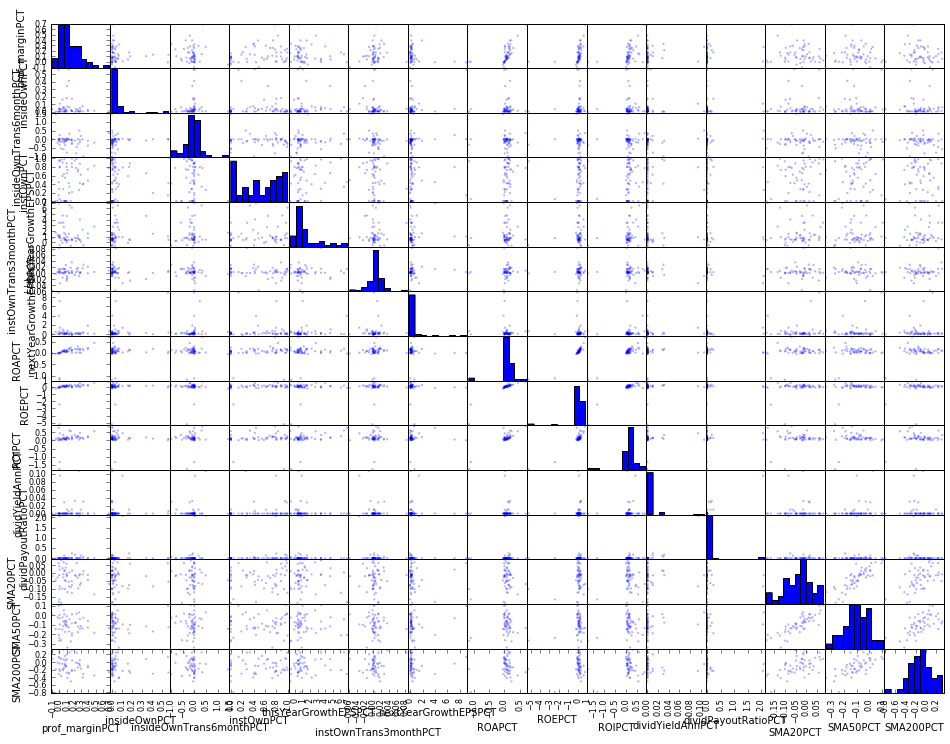

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_allndlist_25_PCT,figsize= (16,12),alpha=0.3)

In [28]:
data_industry = [go.Histogram(
        y=df_allndlist['industry'])
           ]

layout = go.Layout(
    title='industry hist Results',
    xaxis=dict(
        title='Count',
        type ='log'
    ),
    yaxis=dict(
        title='industry',
        automargin=True
    ),
    bargap=0.2,
    autosize=False,
    width=1000,
    height=2000,
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),

)
fig = go.Figure(data=data_industry, layout=layout)
py.iplot(fig, filename='styled histogram')